## Qutip Solution

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ket_g = basis(2,1)
ket_e = basis(2,0)

In [3]:
L1 = ket_e*dag(ket_g)
L2 = ket_g*dag(ket_e)
gamma_1 = 0.1
gamma_2 = 0.3

In [4]:
sigma_ee = ket_e*dag(ket_e)
sigma_gg = ket_g*dag(ket_g)
omega_z, omega_x = [2, 1]

In [5]:
H = omega_z * sigmaz() + omega_x*sigmax()
psi0 = basis(2, 1)
times = np.linspace(0.0, 20.0, 300)

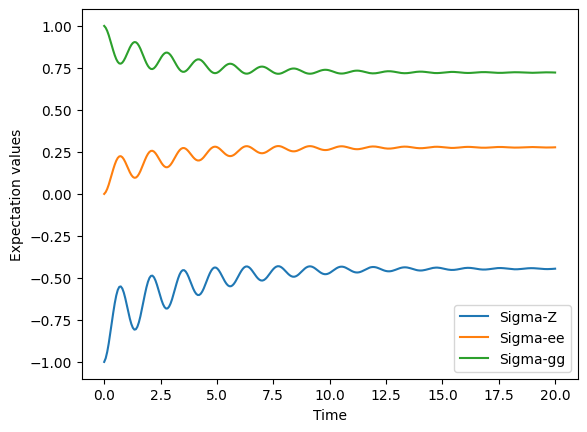

In [6]:
result = mesolve(H, psi0, times, [np.sqrt(gamma_1) * L1, np.sqrt(gamma_2) * L2], [sigmaz(),sigma_ee, sigma_gg])
#result = sesolve(H, psi0, times, [sigmaz()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])
ax.plot(result.times, result.expect[2])
#ax.plot(result.times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-ee", "Sigma-gg")) 
plt.show() 

## Solución QUTIP utilizando control

In [7]:
%reset -f

In [8]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ket_g = basis(2,1)
ket_e = basis(2,0)
L1 = ket_e*dag(ket_g)
L2 = ket_g*dag(ket_e)
gamma_1 = 0.1
gamma_2 = 0.3
sigma_ee = ket_e*dag(ket_e)
sigma_gg = ket_g*dag(ket_g)
sigma_z = ket_e*dag(ket_e) - ket_g*dag(ket_g)
omega_z, omega_x = [2, 1]

In [10]:
sigmaz()*ket_g

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]]

In [11]:
H_0 = omega_z * sigma_z + omega_x*sigmax()
H_1 = sigma_ee
xi = np.load("xi_control_resultado1.npy").transpose().squeeze()
H = [H_0, [H_1, xi]]

psi0 = basis(2, 1)
times = np.linspace(0.0, 20.0, 300)

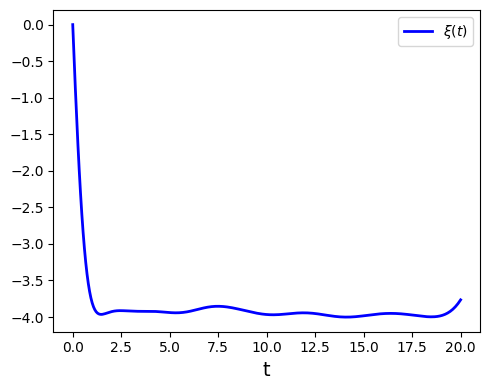

In [12]:
lineW = 2 # Line thickness
plt.figure(figsize=(5,4), tight_layout=True)
plt.plot(times, xi,'-b', linewidth=2, label=r'$\xi(t)$'); 
axes = plt.gca()
plt.xlabel('t')
axes.xaxis.label.set_size(14)
axes.yaxis.label.set_size(14)
plt.legend(prop={"size":10})

In [13]:
result = mesolve(H, psi0, times, [np.sqrt(gamma_1) * L1, np.sqrt(gamma_2) * L2], [sigma_z, sigma_ee, sigma_gg, ket_e*dag(ket_g)])

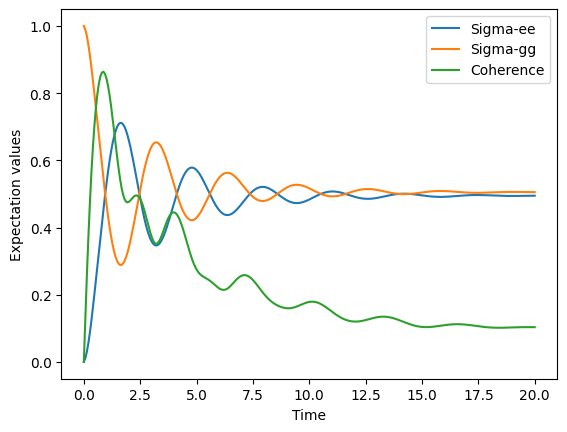

In [14]:
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.plot(result.times, np.real(2*np.sqrt(result.expect[3]*np.conjugate(result.expect[3])))) 
#ax.plot(result.times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-ee", "Sigma-gg", "Coherence")) 
plt.show() 